# Visualization Embedding

##

### 2022-1 RecommenderSystem Project

#### Enviroment

- python ->	3.9.7
- pandas ->	1.4.1
- numpy ->	1.21.5
- torch -> 1.10.2

#### Data

- beer_reviews.csv (<https://www.kaggle.com/datasets/rdoume/beerreviews>)

#### Author

- Lee Junhee

In [11]:
import numpy as np
import pandas as pd
import pickle

import torch

import matplotlib.pyplot as plt

기존의 맥주 임베딩을 가져온다.

In [12]:
with open('./data/beers_with_embedding.pkl', 'rb') as f:
    beers = pickle.load(f)
beers

,beer_name,beer_style,tokens,encoded,embedding
0,# 100,American Barleywine,"[batch, wheat, chocolate, yeast, local, water]","[3030, 3446, 3492, 3547, 3552, 3562]","[-0.038733605, -0.141257, -0.1314186, -0.02864..."
1,#9,Fruit / Vegetable Beer,"[secrecy, mysterious, unusual, palate, tongue,...","[0, 1, 1624, 2324, 2434, 2542, 2927, 3505, 3528]","[-0.091067806, -0.2556749, 0.36461538, -0.2318..."
2,'t Smisje BBBourgondier,Quadrupel (Quad),"[available, honor]","[2571, 3460]","[-0.04127886, -0.10878571, 0.41264004, -0.2201..."
3,10 Commandments,Belgian Strong Dark Ale,"[stronger, version, contemplative, alcohol, co...","[2, 3, 4, 1625, 2435, 2632, 2783, 2837, 3388, ...","[-0.13049294, 0.011829153, 0.28523436, -0.2022..."
4,1100 Wheat Wine,Wheatwine,"[first, bourbon]","[3064, 3500]","[-0.28391176, -0.034813236, 0.2492991, -0.2185..."
...,...,...,...,...,...
1187,Zwickel,Keller Bier / Zwickel BierKeller Bier / Zwicke...,"[flagship, lager, zvickel, unfiltered, unpaste...","[2218, 2219, 2291, 2529, 3429, 3450, 3524, 355...","[0.17450069, 0.21993855, -0.28006345, -0.13167..."
1188,ZÔN,Witbier,"[summer, seasonal, interpretation, classic, be...","[1616, 2308, 3088, 3298, 3358, 3390, 3471, 349...","[0.069744915, -0.11311212, -0.25845426, 0.2089..."
1189,Éphémère (Apple),Fruit / Vegetable Beer,"[ephemeral, series, seasonal, fruit, refreshin...","[1617, 1618, 1619, 1956, 1998, 2035, 2066, 227...","[0.006539313, -0.2198533, 0.09618703, 0.149628..."
1190,Équinoxe Du Printemps,Scotch Ale / Wee Heavy,"[quinoxe, spring, equinox, quintessential, mar...","[1620, 1621, 1622, 1726, 2222, 2333, 2358, 239...","[0.31319603, 0.0055345288, 0.020530751, 0.1622..."


In [13]:
embeddings = []
for embedding in beers.embedding:
	embeddings.append(embedding)
embeddings = np.array(embeddings)
embeddings = torch.tensor(embeddings)
print(embeddings)
print(embeddings.shape)

tensor([[-0.0387, -0.1413, -0.1314,  ..., -0.0551,  0.0455, -0.0229],
        [-0.0911, -0.2557,  0.3646,  ..., -0.2661, -0.3114, -0.2557],
        [-0.0413, -0.1088,  0.4126,  ..., -0.1693,  0.3274, -0.1892],
        ...,
        [ 0.0065, -0.2199,  0.0962,  ..., -0.2203, -0.0314, -0.1425],
        [ 0.3132,  0.0055,  0.0205,  ..., -0.0546, -0.2242,  0.1931],
        [-0.1983, -0.0682, -0.1618,  ...,  0.0858, -0.0981, -0.0989]])
torch.Size([1192, 100])


PCA 모델을 통해 맥주 임베딩 차원을 축소한다. 

In [14]:
U, S, V = torch.pca_lowrank(embeddings, 2)
print(U.shape, S.shape, V.shape)

embeddingsDim2 = np.matmul(embeddings, V)
embeddingsDim2

torch.Size([1192, 2]) torch.Size([2]) torch.Size([100, 2])


tensor([[-0.0335,  0.0282],
        [ 0.0417, -0.1297],
        [-0.3309, -0.6334],
        ...,
        [-0.1517, -0.4122],
        [-0.2559, -0.0330],
        [ 0.4912,  0.3482]])

2차원의 임베딩 벡터를 시각화 한다.

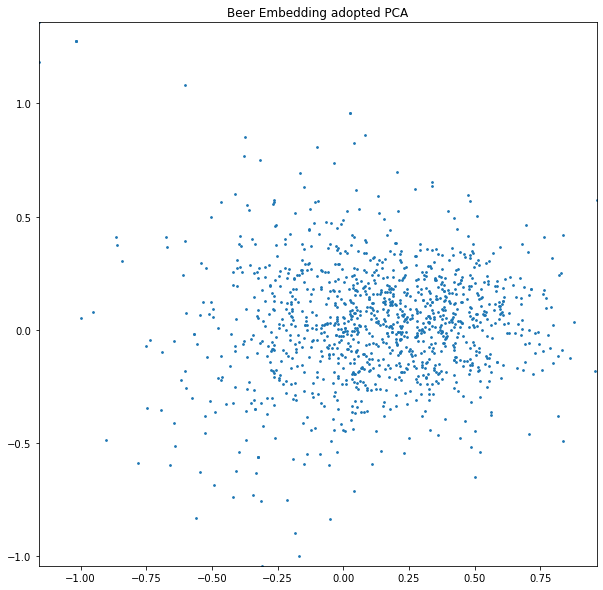

In [15]:
plt.rcParams['figure.figsize'] = [10, 10] # you can change size for your style
plt.xlim(embeddingsDim2[:,0].min(), embeddingsDim2[:,0].max()) # 축 범위 조정
plt.ylim(embeddingsDim2[:,1].min(), embeddingsDim2[:,1].max()) # 축 범위 조정

plt.scatter(embeddingsDim2[:,0],embeddingsDim2[:,1], s= 3)


plt.title('Beer Embedding adopted PCA')
plt.show()

유의미한 분포를 갖고 있지 않다.

그래도 일단 임의의 맥주 스타일 특정하여 같은 맥주 스타일을 갖는 맥주 확인해보자

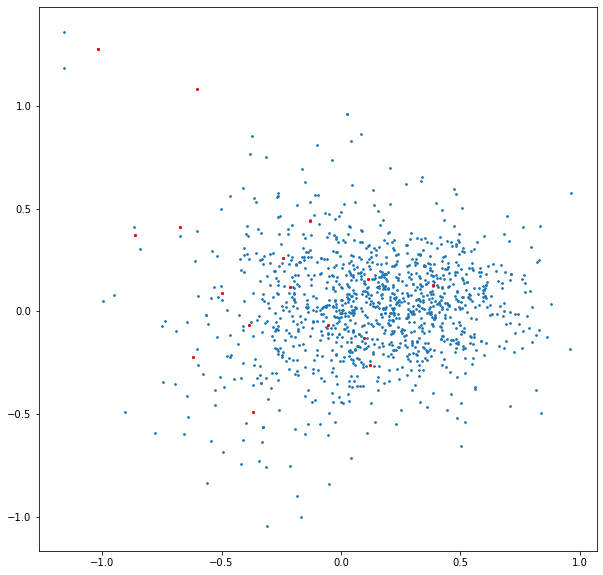

In [16]:
plt.scatter(embeddingsDim2[:,0],embeddingsDim2[:,1], s= 3)
belgianX = embeddingsDim2[beers[beers.beer_style == 'Belgian Strong Dark Ale'].index.values,0]
belgianY = embeddingsDim2[beers[beers.beer_style == 'Belgian Strong Dark Ale'].index.values,1]
plt.scatter(belgianX, belgianY, s=4, c='red')
plt.show()

분산되어 있다.

Description 단어를 이용해 임베딩 하였으니 특정 단어를 선택하여 다시한번 시도해보자.

In [17]:
sweetBeers = []
for index, tokens in enumerate(beers.tokens):
	if 'sweet' in tokens:
		sweetBeers.append(index)

print(sweetBeers)

[45, 53, 54, 61, 106, 129, 171, 178, 190, 194, 208, 225, 229, 245, 247, 250, 257, 259, 271, 276, 288, 303, 304, 315, 332, 333, 349, 352, 354, 371, 393, 408, 412, 413, 414, 423, 428, 446, 450, 457, 462, 463, 467, 476, 489, 514, 536, 537, 555, 557, 592, 619, 620, 622, 623, 625, 629, 635, 647, 649, 663, 667, 685, 689, 699, 702, 708, 712, 718, 729, 740, 750, 753, 777, 778, 779, 789, 807, 813, 833, 834, 845, 852, 906, 912, 916, 938, 947, 950, 959, 960, 985, 1001, 1008, 1012, 1037, 1050, 1089, 1094, 1098, 1101, 1109, 1127, 1136, 1151, 1166, 1168, 1182]


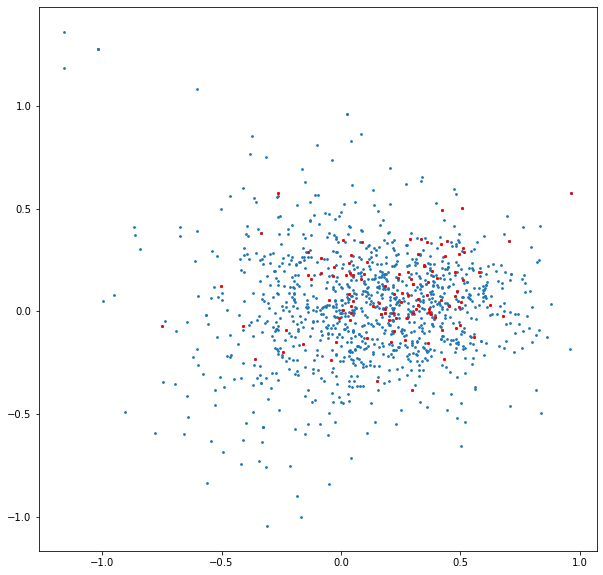

In [18]:
plt.scatter(embeddingsDim2[:,0],embeddingsDim2[:,1], s= 3)
sweetX = embeddingsDim2[sweetBeers,0]
sweetY = embeddingsDim2[sweetBeers,1]
plt.scatter(sweetX, sweetY, s=4, c='red')
plt.show()

분산되어있다.

결론: 임베딩이 잘 안되었다. 해당 임베딩으로 맥주를 추천하기에는 부적합하다.

개선방안
1. 어휘 구성의 노이즈가 많으니 더 제거한다.
2. 특정 맥주의 Description 내부 단어들은 유사한 단어일 것이라는 전제에서 특정 맥주 내부 단어들의 페어를 짰다. 어휘에서 비슷한 단어들을 분류해두고 해당 그룹의 페어로 다시 학습시킨다.
3. Pre-trained Word2Vec모델을 사용한다.

In [20]:
lagers = []
for index, tokens in enumerate(beers.tokens):
	if 'lager' in tokens:
		lagers.append(index)

print(lagers)

[8, 31, 44, 50, 54, 71, 73, 83, 91, 97, 143, 144, 162, 168, 172, 176, 210, 212, 230, 262, 268, 271, 273, 289, 293, 294, 316, 320, 323, 324, 330, 336, 338, 348, 349, 360, 366, 393, 437, 447, 449, 460, 471, 478, 489, 491, 495, 496, 497, 522, 527, 531, 584, 598, 608, 610, 611, 612, 626, 628, 629, 643, 644, 653, 661, 668, 679, 682, 693, 704, 707, 713, 720, 730, 734, 750, 753, 758, 759, 775, 784, 789, 827, 837, 838, 847, 849, 857, 882, 887, 892, 896, 903, 912, 929, 948, 950, 957, 958, 966, 967, 969, 972, 987, 1006, 1010, 1022, 1029, 1035, 1039, 1047, 1054, 1071, 1080, 1083, 1107, 1124, 1125, 1126, 1168, 1173, 1182, 1183, 1187]


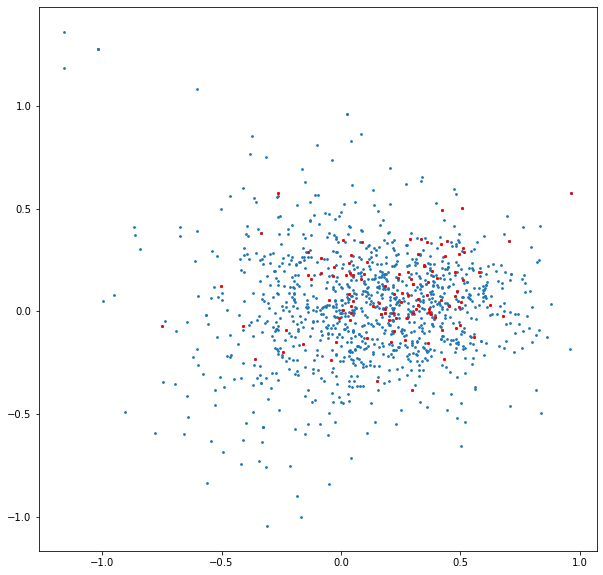

In [21]:
plt.scatter(embeddingsDim2[:,0],embeddingsDim2[:,1], s= 3)
lagerX = embeddingsDim2[sweetBeers,0]
lagerY = embeddingsDim2[sweetBeers,1]
plt.scatter(lagerX, lagerY, s=4, c='red')
plt.show()